# 174. LIMPIEZA DEL DATASET DEL CANCER 

## K NEAREST NEIGHBORS 

In [4]:
#data set del cancer de mama. 
import pandas as pd 
import numpy as np 
from sklearn import preprocessing, model_selection, neighbors

In [11]:
df = pd.read_csv("C:/Users/URIEL/Downloads/python-ml-course-master (2)/datasets/cancer/breast-cancer-wisconsin.data.txt", header = None)

In [12]:
df.head(), #la primera columna es un identificador de cada paciente, entonces no nos serviria de mucho. 
#Se trata de un dataset que no trae cabecera apriori, lo ideal es ponerle nombre a cada una de las columnas. 

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [14]:
df.describe() #el dataset no tiene valores NA.

,0,1,2,3,4,5,7,8,9,10
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [15]:
df.columns = ["name", "V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9", "class"]

In [16]:
df.head()

,name,V1,V2,V3,V4,V5,V6,V7,V8,V9,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [20]:
df = df.drop(["name"], axis = 1)

In [34]:
df.replace("?", -99999, inplace = True)

In [35]:
Y = df["class"]

In [67]:
X = df[["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9"]]

In [68]:
X.head() #es basicamente lo que analizamos del enfermo, ya sean proteinas, metabolismo, etc. 

,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [69]:
#en base a esos datos, lo que nosotros vamos a querer predecir, es si el tumor resulta bueno "2", o maligno y necesitamos operar "4"
Y.head()

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64

# 175. CLASIFICACION SEGUN LOS K VECINOS 

In [70]:
#es hora de empezar a entrenar el algoritmo, usamos la validacion cruzada, 
X_train, X_test, Y_train, Y_test =model_selection.train_test_split(X,Y, test_size = 0.2)

In [71]:
#el clasificador 
clf = neighbors.KNeighborsClassifier()

In [72]:
clf.fit(X_train, Y_train)

KNeighborsClassifier()

In [73]:
accuracy = clf.score(X_test, Y_test) #probaremos la presicion, pasandole los test, para ver como de bien han funcionado los datos
accuracy #esto para ver como de bien han funcionado los datos, en un 95%. 

0.9714285714285714

¿Como usar esta tecnica para predecir si la celula es o no cancerigena en base a una nueva observacion falsificando los datos del test que se hayan llevado acabo. 

# 176. CLASIFICANDO NUEVOS DATOS DE LOS TESTS MEDICOS 

Clasificar nuevos datos, suponer que llega un nuevo enfermo, le hacemos las mediciones, los test y queremos predecir que tipo de dato queremos. Mas que entrenar el modelo, se basa en clasificar  los datos de utilizar la info que tenemos supervisada para clasificar nuevas muestras cancerigenas. Utilizaremos informacion en base al promedio de las celular cancerigenas o no cancerigenas, agregaremos algo de desviacion estandar, algo de ruido, generando datos cualesquiera. 

In [74]:
sample_measure = np.array([4,2,1,1,1,2,3,2,1]) #suponer que son los datos de una persona nueva.

In [75]:
sample_measure = sample_measure.reshape(1,-1)

In [77]:
predict = clf.predict(sample_measure)

In [78]:
predict #array que nos devuelve 2, que no ha clasificado en la celula de tipo 2. que es benigna. 
#con estos datos, tenemos la seguridad que la prediccion es benigna. 


array([2], dtype=int64)

In [81]:
#si nos hacemos la prueba dos veces o dos personas. 
sample_measure2 = np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,1,1,2,3,2,1]]).reshape(2,-1) #dos columnas y -1

In [82]:
predict = clf.predict(sample_measure2)

In [83]:
predict #entran en la misma clase, sin ningun problema. 

array([2, 2], dtype=int64)

Construiremos ahora el algoritmo de los KNN directamente, en lugar de usar scikit learn, para ver como funciona y cuando debemos de optar por otro tipo de algoritmo. 

# 177. CREANDO LOS DATOS PARA LA CLASIFICACION 

## CREANDO NUESTRO PROPIO KNN

Se basa en un concepto de la distancia euclidea. 

In [85]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import style 
import warnings 
from math import sqrt 
from collections import Counter 

In [86]:
dataset = {
    'k' : [[1,2],[2,3],[3,1]],
    'r' : [[6,5],[7,7],[8,6]]
} #diccionario de python
new_point = [5,7] #punto que queremos clasificar

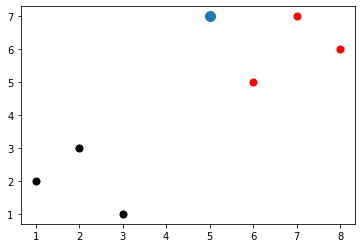

In [91]:
#hacemos un scatterplot
#hacemos el plot del siguiente modo. 
[[plt.scatter(ii[0], ii[1], s = 50, color = i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_point[0], new_point[1], s = 100)

In [92]:
#queremos llevar una funcion de k nearest neighbors que  sea capaz de hcaerlo por nosotros. 
def k_nearest_neighbors_(data,  predict, k = 3): #informacion para entrenar e informacion para predecir.
    
    if len(data) >= k:
        warnings.warn("K es un valor menor que el numero total de elementos a votar!!")
    
    return vote_result #proporcionamos informacion a la funcion

In [ ]:
#¿Como podemos encontrar los 3 puntos mas cercanos? 
#simplemente tiene que servir el metodo para cualquier tipo de dataset, clasificacion, etc. 

# 178. IMPLEMENTANDO LA DECISION POR MAYORIA

¿Como seremos capaz de comparar cada uno de los grupos que existan en el conjunto de datos, contra lo que quiero clasificar, creamos una lista en python que contendra otra lista, que a su vez tendra las distancias seguidas de la clase para cada uno de los puntos del dataset. Una vez que lo tengamos, podriamos ordenar esa lista por distancia mas cercana y tomar los k primero valores de la lista para encontrar el mas popular. 

In [94]:
def k_nearest_neighbors_(data,  predict, k = 3): 
    
    if len(data) >= k:
        warnings.warn("K es un valor menor que el numero total de elementos a votar!!")
        
        distances = []
        for group in data:
            for feature in data[group]:
                d = sqrt((feature[0] - predict[0])**2 + (feature[1] - predict[1])**2)
                distances.append([d, group])
                
    
    return vote_result